In [8]:
from matplotlib import pyplot as plt
%matplotlib inline
import pandas as pd

In [9]:
file = pd.read_csv("E:/read_csv/data.csv")

In [10]:
file.shape

(891, 12)

In [11]:
file.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [12]:
file.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [13]:
file.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Univariate Analysis of Continous Variable

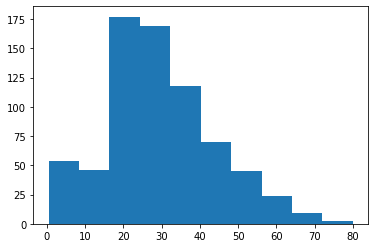

In [16]:
#plotting histogram
plt.hist(file['Age'])
plt.show()

<AxesSubplot:>

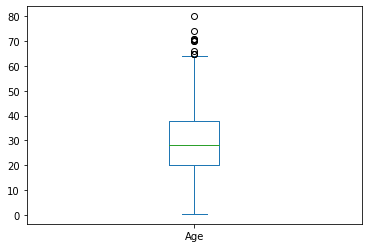

In [19]:
#plotting a Box plot for age variable
file['Age'].plot.box()

# Univariate analysis of Categorical Variable

In [21]:
file['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

<AxesSubplot:>

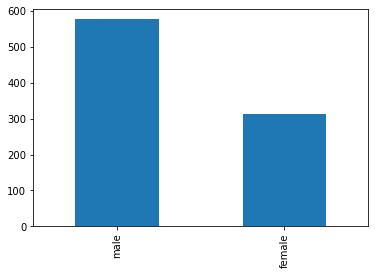

In [22]:
file['Sex'].value_counts().plot.bar()

In [23]:
#create percentages from frequencies 
file['Sex'].value_counts()/len(file['Sex'])

male      0.647587
female    0.352413
Name: Sex, dtype: float64

<AxesSubplot:>

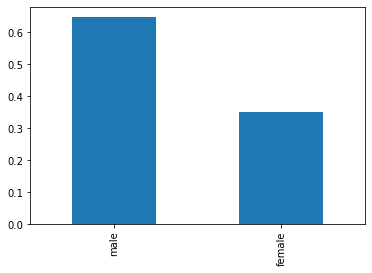

In [26]:
(file['Sex'].value_counts()/len(file['Sex'])).plot.bar()

# Continous - Continous Bivariate Analysis

In [28]:
file.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<AxesSubplot:xlabel='Age', ylabel='Fare'>

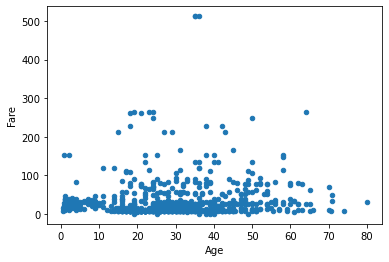

In [29]:
file.plot.scatter('Age','Fare')

In [30]:
file.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [32]:
file['Age'].corr(file['Fare'])

0.09606669176903887

# Categorical - Continous Bivariate Analysis

In [33]:
file.groupby('Sex')['Age'].mean()

Sex
female    27.915709
male      30.726645
Name: Age, dtype: float64

<AxesSubplot:xlabel='Sex'>

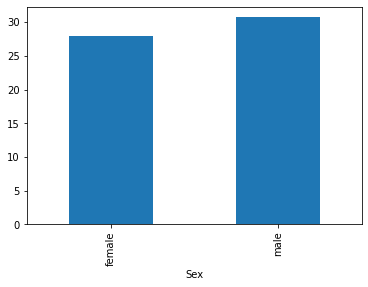

In [34]:
file.groupby('Sex')['Age'].mean().plot.bar()

In [35]:
#importing scipy library for ttest

from scipy.stats import ttest_ind

In [36]:
males = file[file['Sex']=='male']

In [37]:
females = file[file['Sex']=='female']

In [40]:
ttest_ind(males['Age'],females['Age'],nan_policy = 'omit')

Ttest_indResult(statistic=2.499206354920835, pvalue=0.012671296797014266)

# Bivariate Analysis of Categorical-Categorical Variable

In [41]:
pd.crosstab(file['Sex'],file['Survived'])

Survived,0,1
Sex,,
female,81,233
male,468,109


In [43]:
from scipy.stats import chi2_contingency

In [44]:
chi2_contingency(pd.crosstab(file['Sex'],file['Survived']))

(260.71702016732104,
 1.1973570627755645e-58,
 1,
 array([[193.47474747, 120.52525253],
        [355.52525253, 221.47474747]]))